In [1]:
# Import Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from copy import deepcopy
import math

2024-07-29 23:28:37.758684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 23:28:37.922854: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 23:28:38.133031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 23:28:38.368576: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 23:28:38.433597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 23:28:38.855080: I tensorflow/core/platform/cpu_feature_gu

In [5]:

df = pd.read_csv('./data/cleaned_weekly_stock_market.csv')

amen_bank = df[df['companyName'] == 'AMEN BANK']

In [6]:
print(amen_bank.shape)

(522, 7)


In [7]:
amen_bank_closing_price = amen_bank.reset_index()['closingPrice']
print(amen_bank_closing_price)

0      22.75
1      22.65
2      22.65
3      22.75
4      22.49
       ...  
517    43.99
518    43.20
519    44.00
520    43.99
521    43.90
Name: closingPrice, Length: 522, dtype: float64


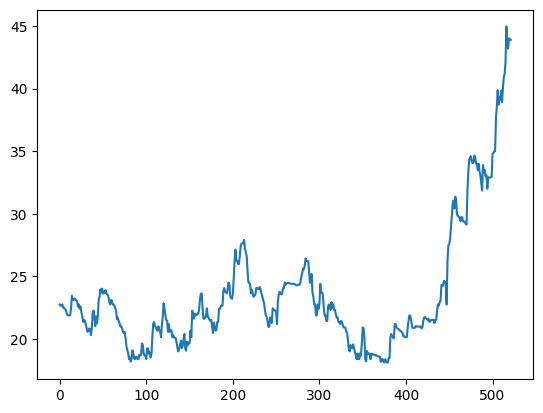

In [8]:
plt.plot(amen_bank_closing_price)
plt.show()

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(amen_bank_closing_price).reshape(-1, 1))
print(scaled_data)

[[0.17274758]
 [0.16902457]
 [0.16902457]
 [0.17274758]
 [0.16306776]
 [0.16269546]
 [0.15934475]
 [0.15599404]
 [0.14668652]
 [0.14035741]
 [0.14035741]
 [0.14035741]
 [0.14035741]
 [0.15971705]
 [0.19843634]
 [0.18726731]
 [0.18577811]
 [0.19061802]
 [0.18912882]
 [0.18428891]
 [0.1824274 ]
 [0.16641847]
 [0.17274758]
 [0.15971705]
 [0.16641847]
 [0.14929263]
 [0.1370067 ]
 [0.12062547]
 [0.12732688]
 [0.12397617]
 [0.11429635]
 [0.10275503]
 [0.0912137 ]
 [0.09456441]
 [0.10126582]
 [0.09791512]
 [0.08116158]
 [0.10126582]
 [0.14668652]
 [0.15450484]
 [0.1377513 ]
 [0.10796724]
 [0.1370067 ]
 [0.11727476]
 [0.14035741]
 [0.18912882]
 [0.19545793]
 [0.21779598]
 [0.20848846]
 [0.22002978]
 [0.20513775]
 [0.20551005]
 [0.21146687]
 [0.21518987]
 [0.20551005]
 [0.20178704]
 [0.19880864]
 [0.1824274 ]
 [0.17274758]
 [0.18540581]
 [0.18540581]
 [0.17274758]
 [0.17274758]
 [0.16939687]
 [0.16232316]
 [0.15599404]
 [0.12881608]
 [0.13328369]
 [0.12397617]
 [0.11727476]
 [0.10759494]
 [0.10

In [10]:
##splitting dataset into train and test split
training_size = int(len(scaled_data) * 0.65)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [12]:

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape), print(y_train.shape)

(328, 10)
(328,)


(None, None)

In [14]:
print(X_test.shape), print(y_test.shape)

(172, 10)
(172,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/home/firas/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - loss: 0.0189 - val_loss: 0.0376
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0061 - val_loss: 0.0416
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037 - val_loss: 0.0624
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0044 - val_loss: 0.0416
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0033 - val_loss: 0.0264
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0030 - val_loss: 0.0309
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0026 - val_loss: 0.0226
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0023 - val_loss: 0.0134
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0021 - val_loss: 0.0095
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020 - val_l

In [19]:
### Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
math.sqrt(mean_squared_error(y_train,train_predict))

22.193659450174575

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

25.87696429817787

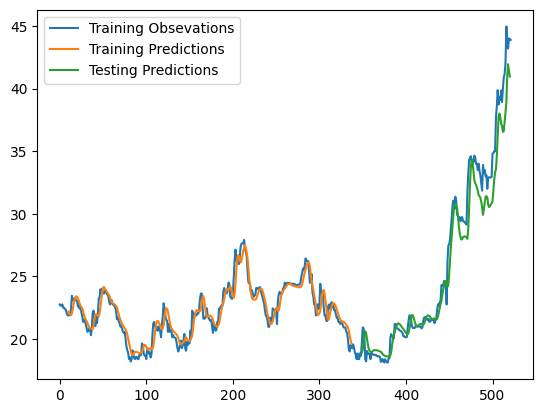

In [23]:
### Plotting 
#  train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# test predictions for plotting
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict

plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Training Obsevations', 
                    'Training Predictions',
                    'Testing Predictions', 
                    ])
plt.show()

In [24]:
len(test_data)

183

In [25]:
x_input=test_data[84:].reshape(1,-1)
x_input.shape

(1, 99)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
temp_input

[0.1314221891288161,
 0.13030528667163066,
 0.12658227848101267,
 0.13030528667163066,
 0.12062546537602381,
 0.12211466865227105,
 0.12658227848101267,
 0.12658227848101267,
 0.12658227848101267,
 0.12695457930007437,
 0.11727475800446763,
 0.12546537602382724,
 0.127699180938198,
 0.15636634400595673,
 0.17274758004467605,
 0.16939687267311987,
 0.17944899478778853,
 0.18428890543559184,
 0.23045420699925534,
 0.2293373045420699,
 0.2285927029039464,
 0.24274013402829475,
 0.23790022338049144,
 0.23790022338049144,
 0.17274758004467605,
 0.3030528667163067,
 0.3488458674609083,
 0.35182427401340277,
 0.368205510052122,
 0.40096798212956064,
 0.43633655994043186,
 0.47207743857036477,
 0.4821295606850333,
 0.4579300074460164,
 0.4932985852568874,
 0.4817572598659716,
 0.44005956813104974,
 0.43670886075949356,
 0.43261355174981375,
 0.43186895011169013,
 0.42032762472077434,
 0.43186895011169013,
 0.43261355174981375,
 0.42032762472077434,
 0.41995532390171264,
 0.41697691734921816,
 

In [37]:
# Ensure temp_input has exactly 100 elements before starting the loop
if len(temp_input) < 100:
    temp_input = [0] * (100 - len(temp_input)) + temp_input

# Pre-allocate lst_output to avoid dynamic resizing
lst_output = [0] * 30
n_steps = 100

for i in range(30):
    x_input = np.array(temp_input[-100:])  # Take the last 100 elements
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape((1, n_steps, 1))
    
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    lst_output[i] = yhat[0][0]
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]

0 day input [0.         0.43633656 0.47207744 0.48212956 0.45793001 0.49329859
 0.48175726 0.44005957 0.43670886 0.43261355 0.43186895 0.42032762
 0.43186895 0.43261355 0.42032762 0.41995532 0.41697692 0.41399851
 0.4102755  0.50819062 0.56366344 0.60275503 0.60908414 0.61392405
 0.59940432 0.5930752  0.59642591 0.61578555 0.61020104 0.591586
 0.5912137  0.57297096 0.591586   0.56924795 0.55658972 0.53536858
 0.51154133 0.58786299 0.56552494 0.57297096 0.55435592 0.55770663
 0.51712584 0.55063291 0.55063291 0.55063291 0.55026061 0.55286672
 0.62137007 0.62323157 0.62881608 0.62881608 0.7293373  0.76247208
 0.81049888 0.76768429 0.78890544 0.78145942 0.80938198 0.77513031
 0.81459419 0.84847357 0.85889799 0.88942666 1.         0.96351452
 0.93410276 0.96388682 0.96351452 0.96016381 0.90077174 0.86084247
 0.80581248 0.74251032 0.67391473 0.60251486 0.53081417 0.46121278
 0.39579895 0.33616635 0.28333482 0.23779838 0.19964491 0.16865863
 0.14437006 0.12609215 0.11298393 0.10414422 0.09870

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(scaled_data)

522

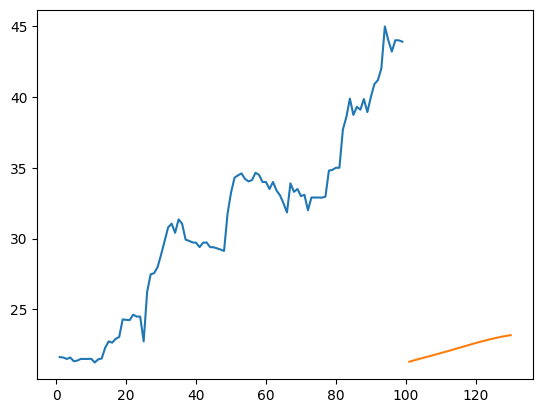

In [42]:
# Ensure day_new and scaled_data[423:] have the same length
day_new = day_new[:len(scaled_data[423:])]

# Ensure day_pred and lst_output have the same length
day_pred = day_pred[:len(lst_output)]

# Reshape the arrays to 2D before inverse transforming
scaled_data_reshaped = scaled_data[423:].reshape(-1, 1)
lst_output_reshaped = np.array(lst_output).reshape(-1, 1)

# Plot the data
plt.plot(day_new, scaler.inverse_transform(scaled_data_reshaped))
plt.plot(day_pred, scaler.inverse_transform(lst_output_reshaped))
plt.show()

ValueError: Input could not be cast to an at-least-1D NumPy array

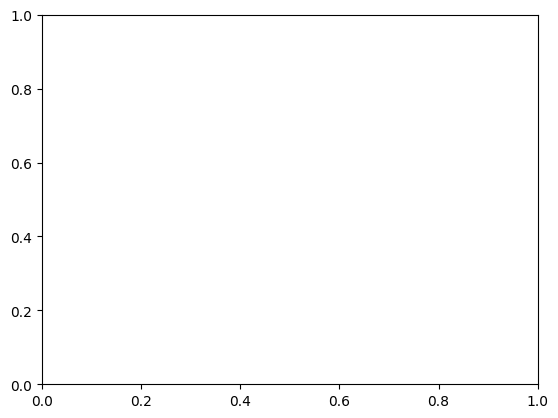

In [43]:
stock_pred=scaled_data.tolist()
stock_pred.extend(lst_output)
plt.plot(stock_pred[400:])

In [ ]:
stock_pred=scaler.inverse_transform(stock_pred).tolist()

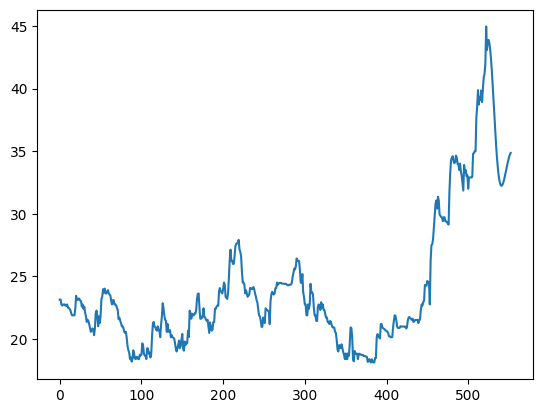

In [ ]:
plt.plot(stock_pred)